In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# 그래프 한글 출력 안 될 시

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

In [38]:
PM45 = pd.read_csv('C:/Users/junyoon/Desktop/데이터/PM/씽씽_도로교통공단_2020.04_2020.05.csv', encoding='cp949')
PM67 = pd.read_csv('C:/Users/junyoon/Desktop/데이터/PM/씽씽_도로교통공단_2020.06_2020.07.csv', encoding='cp949')
PM89 = pd.read_csv('C:/Users/junyoon/Desktop/데이터/PM/씽씽_도로교통공단_2020.08_2020.09.csv', encoding='cp949')
PM1011 = pd.read_csv('C:/Users/junyoon/Desktop/데이터/PM/씽씽_도로교통공단_2020.10_2020.11.csv', encoding='cp949')
PMAC = pd.read_csv('C:/Users/junyoon/Desktop/데이터/PM/씽씽_4월 이후 보험접수완료된 사고건 (서울 내 일부).csv', encoding='cp949')

In [180]:
PM = pd.concat([PM45, PM67, PM89, PM1011])

In [8]:
PM.head()

,이용Id,유저Id,나이,성별,대여시간,반납시간,대여위치,반납위치,대여지역,반납지역,No
0,5e835afd44293c00116de527,5d5134083db28e0012ce8922,42,M,2020-04-01 0:00,2020-04-01 0:02,"127.0414925,37.524345833333335","127.039392,37.525249",강남구,강남구,NaN
1,5e835b00bf45f400117c8889,5dc8e2d21d53bb00133a3d4f,28,M,2020-04-01 0:00,2020-04-01 0:10,"127.0070415,37.511216833333336","127.0102615,37.501362666666665",서초구,서초구,NaN
2,5e835b020289d700116f89a1,5e815ac9a251020013c4c923,26,F,2020-04-01 0:00,2020-04-01 0:07,"127.07693016666667,37.552242166666666","127.07218166666667,37.54731966666667",광진구,광진구,NaN
3,5e835b0dbf45f400117c888c,5da1d14d6b739200136d288e,25,M,2020-04-01 0:00,2020-04-01 0:14,"127.0219735,37.501103666666666","127.01699583333334,37.4841075",서초구,서초구,NaN
4,5e835b2c0289d700116f89a7,5c91f6ccf754b7be11025f7b,25,M,2020-04-01 0:01,2020-04-01 0:08,"127.02469583333334,37.500101666666666","127.02931316666667,37.485144",서초구,서초구,NaN


In [189]:
PM['대여시간'] = PM['대여시간'].astype('str')

In [206]:
PM['대여시간'].iloc[0][5]

'0'

In [ ]:
PM['사용_월'] = '0'
for i in range(len(PM)):
    if PM['대여시간'].iloc[i][5] == '0' :
        PM['사용_월'].iloc[i] = PM['대여시간'].iloc[i][6]
    else :
        PM['사용_월'].iloc[i] = PM['대여시간'].iloc[i][5:7]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
PM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959780 entries, 0 to 524743
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   이용Id    object 
 1   유저Id    object 
 2   나이      int64  
 3   성별      object 
 4   대여시간    object 
 5   반납시간    object 
 6   대여위치    object 
 7   반납위치    object 
 8   대여지역    object 
 9   반납지역    object 
 10  No      float64
dtypes: float64(1), int64(1), object(9)
memory usage: 179.4+ MB


In [15]:
PMC = list(PM.columns)
PMC = PMC[:-1]
PM = PM[PMC]
PM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959780 entries, 0 to 524743
Data columns (total 10 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   이용Id    object
 1   유저Id    object
 2   나이      int64 
 3   성별      object
 4   대여시간    object
 5   반납시간    object
 6   대여위치    object
 7   반납위치    object
 8   대여지역    object
 9   반납지역    object
dtypes: int64(1), object(9)
memory usage: 164.5+ MB


In [17]:
PMAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NO       203 non-null    int64 
 1   사고일자     203 non-null    object
 2   사고일자_월   203 non-null    int64 
 3   사고일자_일   203 non-null    int64 
 4   사고일자_요일  203 non-null    object
 5   사고장소     203 non-null    object
 6   사고내용     203 non-null    object
 7   손해대상     203 non-null    object
dtypes: int64(3), object(5)
memory usage: 12.8+ KB


In [62]:
PMAC.head()

,NO,사고일자,사고일자_월,사고일자_일,사고일자_요일,사고장소,사고내용,손해대상,빈도계산용
0,1,2020-04-01,4,1,수,서울시 서초구 대치동,이면도로에서 오토바이와 충돌,대인,1
1,2,2020-04-06,4,6,월,서울시 강남구 봉은사로,브레이크 결함으로 인한 낙차사고(대인 및 신발손상),대인대물,1
2,3,2020-04-07,4,7,화,서울시 동작구 상도동,"퀵보드 급발진, 브레이크 이상 주장 낙차사고",대인대물,1
3,4,2020-04-09,4,9,목,서울 매봉역 인근 도로,이용부주의로 인한 택시와 충돌로 인한 낙차사고,대인,1
4,5,2020-04-09,4,9,목,서울 강남구 압구정 신구초등학교 인근 도로,운행 중 아스팔트 파인 곳에 걸려 넘어짐,대인,1


In [19]:
PMAC['빈도계산용'] = 1

In [55]:
PMAC요일 = PMAC.groupby('사고일자_요일').빈도계산용.sum()
PMAC요일

사고일자_요일
금    30
목    33
수    26
월    24
일    20
토    26
화    44
Name: 빈도계산용, dtype: int64

In [56]:
PMAC요일 = pd.DataFrame(data=PMAC요일)

In [60]:
PMAC요일=PMAC요일.reset_index()

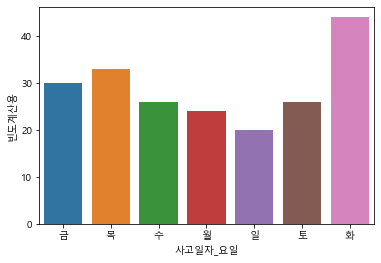

In [61]:
sns.barplot(data = PMAC요일, x='사고일자_요일', y='빈도계산용')

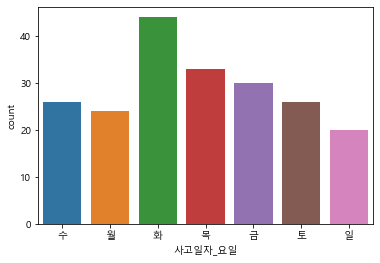

In [63]:
sns.countplot(x="사고일자_요일", data=PMAC)

In [5]:
PMAC.head()

,NO,사고일자,사고일자_월,사고일자_일,사고일자_요일,사고장소,사고내용,손해대상
0,1,2020-04-01,4,1,수,서울시 서초구 대치동,이면도로에서 오토바이와 충돌,대인
1,2,2020-04-06,4,6,월,서울시 강남구 봉은사로,브레이크 결함으로 인한 낙차사고(대인 및 신발손상),대인대물
2,3,2020-04-07,4,7,화,서울시 동작구 상도동,"퀵보드 급발진, 브레이크 이상 주장 낙차사고",대인대물
3,4,2020-04-09,4,9,목,서울 매봉역 인근 도로,이용부주의로 인한 택시와 충돌로 인한 낙차사고,대인
4,5,2020-04-09,4,9,목,서울 강남구 압구정 신구초등학교 인근 도로,운행 중 아스팔트 파인 곳에 걸려 넘어짐,대인


In [50]:
PMAC4 = PMAC.loc[PMAC['사고일자_월'] == 4,]
PMAC5 = PMAC.loc[PMAC['사고일자_월'] == 5,]
PMAC6 = PMAC.loc[PMAC['사고일자_월'] == 6,]
PMAC7 = PMAC.loc[PMAC['사고일자_월'] == 7,]
PMAC8 = PMAC.loc[PMAC['사고일자_월'] == 8,]
PMAC9 = PMAC.loc[PMAC['사고일자_월'] == 9,]
PMAC10 = PMAC.loc[PMAC['사고일자_월'] == 10,]
PMAC11 = PMAC.loc[PMAC['사고일자_월'] == 11,]

In [172]:
ac = []
for i in range(4,12):
    ac.append(len(PMAC.loc[PMAC['사고일자_월']==i,]))
    
print(ac)

[16, 16, 23, 43, 43, 25, 29, 8]


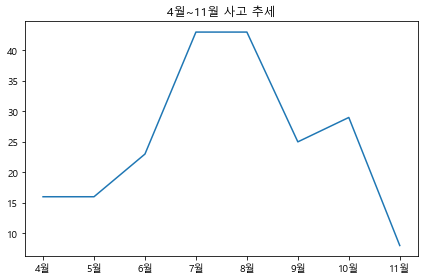

In [178]:
x = ['4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월']
y = ac
plt.plot(x,y)
plt.title('4월~11월 사고 추세')
plt.tight_layout()

- 6월부터 사고가 급증하여 8월까지 매달 40건 이상의 사고가 발생하다, 9월부터 사고가 다시 급감한 뒤, 이후엔 상대적으로 사고가 저조해짐.

In [ ]:
frec = []
for i in range(4,12):
    ac.append(len(PMAC.loc[PMAC['사고일자_월']==i,]))
    
print(ac)

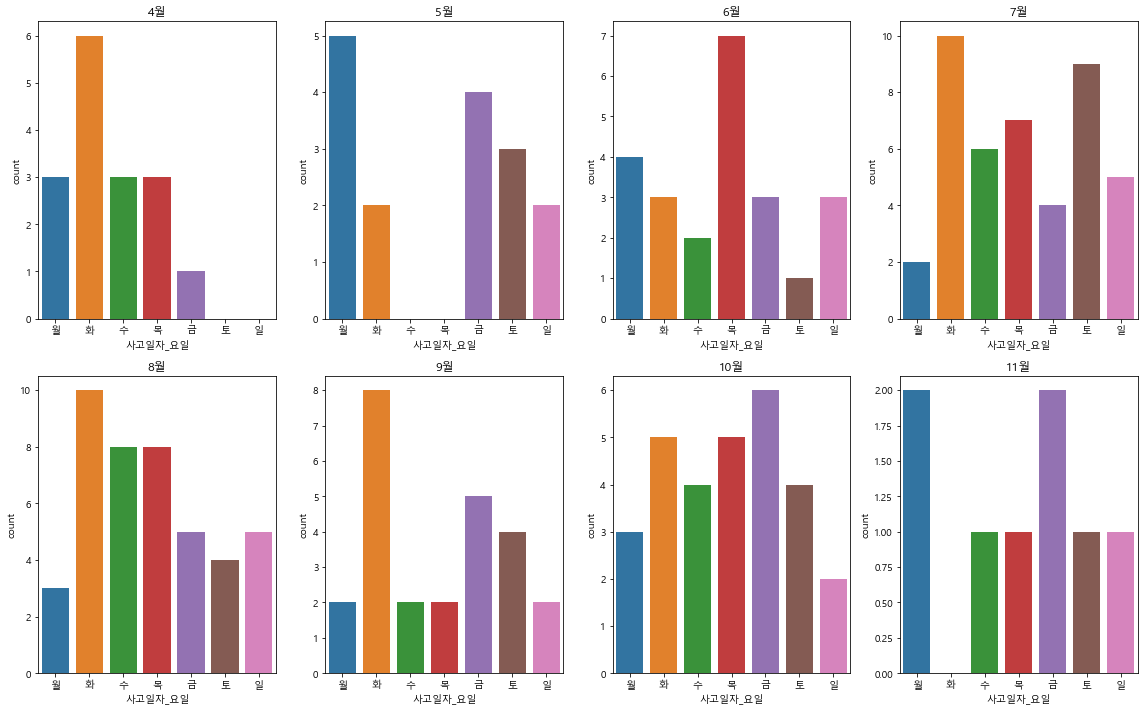

In [142]:
order = ['월','화','수','목','금','토','일']
fig, (ax) = plt.subplots(2,4)
fig.set_size_inches((16, 10)) 

sns.countplot(x='사고일자_요일', data=PMAC4, order = order, ax=ax[0,0])
sns.countplot(x='사고일자_요일', data=PMAC5, order = order, ax=ax[0,1])
sns.countplot(x='사고일자_요일', data=PMAC6, order = order, ax=ax[0,2])
sns.countplot(x='사고일자_요일', data=PMAC7, order = order, ax=ax[0,3])
sns.countplot(x='사고일자_요일', data=PMAC8, order = order, ax=ax[1,0])
sns.countplot(x='사고일자_요일', data=PMAC9, order = order, ax=ax[1,1])
sns.countplot(x='사고일자_요일', data=PMAC10, order = order, ax=ax[1,2])
sns.countplot(x='사고일자_요일', data=PMAC11, order = order, ax=ax[1,3])
ax[0,0].set_title('4월')
ax[0,1].set_title('5월')
ax[0,2].set_title('6월')
ax[0,3].set_title('7월')
ax[1,0].set_title('8월')
ax[1,1].set_title('9월')
ax[1,2].set_title('10월')
ax[1,3].set_title('11월')
fig.tight_layout()

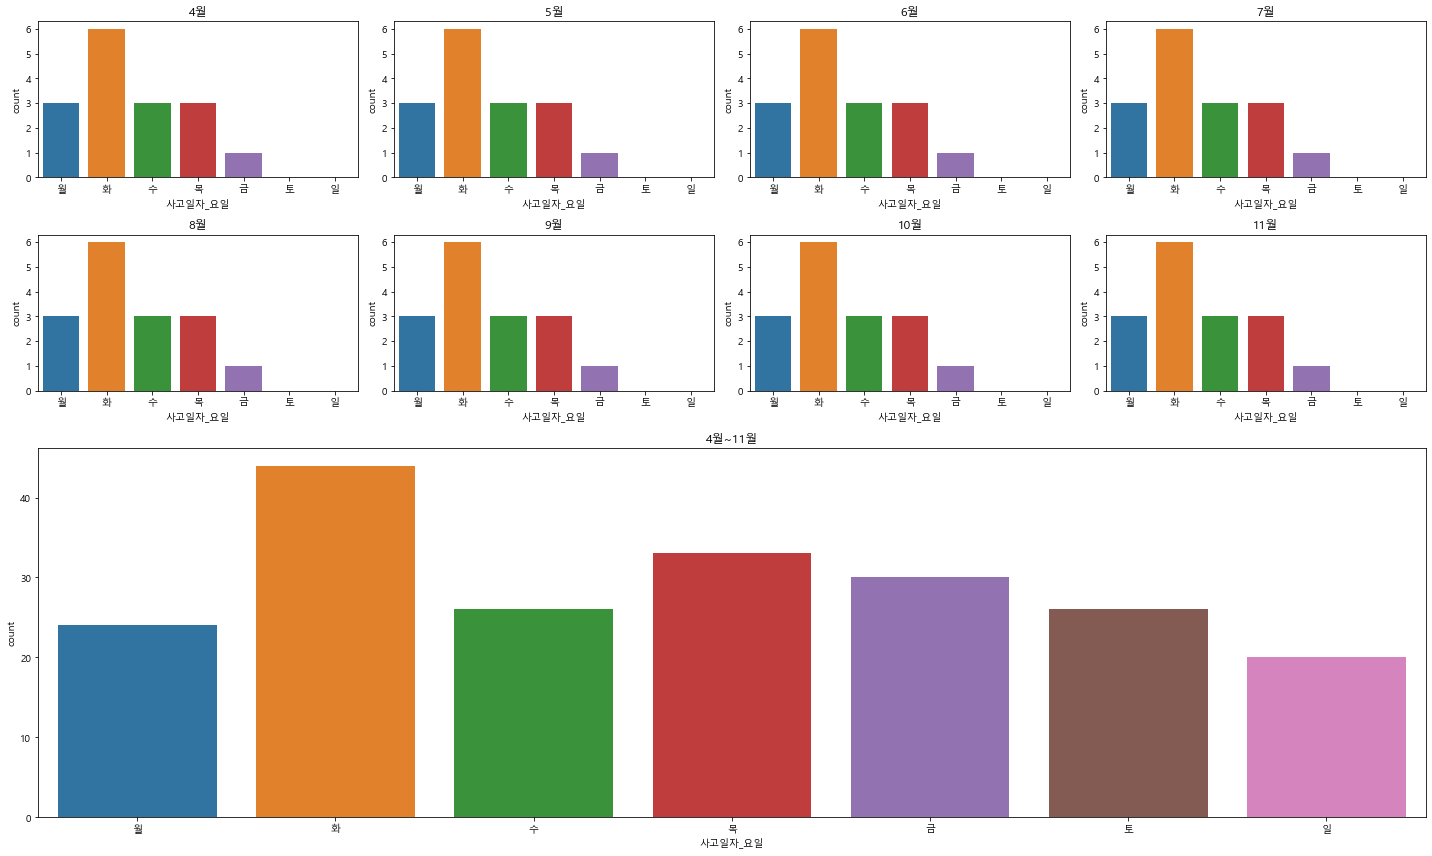

In [131]:
order = ['월','화','수','목','금','토','일']
fig = plt.figure(figsize = (20,12))
gs = fig.add_gridspec(4, 4)
ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(x='사고일자_요일', data=PMAC4, order = order, ax=ax1)
ax1.set_title('4월')
ax2 = fig.add_subplot(gs[0, 1])
sns.countplot(x='사고일자_요일', data=PMAC4, order = order, ax=ax2)
ax2.set_title('5월')
ax3 = fig.add_subplot(gs[0, 2])
sns.countplot(x='사고일자_요일', data=PMAC4, order = order, ax=ax3)
ax3.set_title('6월')
ax4 = fig.add_subplot(gs[0, 3])
sns.countplot(x='사고일자_요일', data=PMAC4, order = order, ax=ax4)
ax4.set_title('7월')
ax5 = fig.add_subplot(gs[1, 0])
sns.countplot(x='사고일자_요일', data=PMAC4, order = order, ax=ax5)
ax5.set_title('8월')
ax6 = fig.add_subplot(gs[1, 1])
sns.countplot(x='사고일자_요일', data=PMAC4, order = order, ax=ax6)
ax6.set_title('9월')
ax7 = fig.add_subplot(gs[1, 2])
sns.countplot(x='사고일자_요일', data=PMAC4, order = order, ax=ax7)
ax7.set_title('10월')
ax8 = fig.add_subplot(gs[1, 3])
sns.countplot(x='사고일자_요일', data=PMAC4, order = order, ax=ax8)
ax8.set_title('11월')

ax9 = fig.add_subplot(gs[2:,:])
sns.countplot(x='사고일자_요일', data=PMAC, order = order, ax=ax9)
ax9.set_title('4월~11월')

fig.tight_layout()

- 4월에는 화요일
- 5월에는 월요일
- 6월에는 목요일
- 7월에는 화요일과 토요일
- 8월에는 화요일
- 9월에는 화요일
- 10월에는 금요일
- 11월에는 월요일과 금요일에 사고가 가장 많다.
- 전체적으로 수요일과 주말에 사고가 적으며, 대체로 <b>화요일</b>에 사고가 잦은 것을 볼 수 있다.

#### 화요일에 비교적 사고가 많다